In [2]:
%matplotlib inline

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

import pandas as pd
from Utils import *

from algorithms import *
from new_utils import *

# Comparison of algorithms for ordinal embedding

In [40]:
#Create data|
dimensions= 15
number_of_points= 200

X = np.random.random((number_of_points, dimensions))
X = center_data(X)

In [41]:
n,d = X.shape
pulls = 3000
triplets, error = getTriplets(X, pulls)
    
# print(ste_loss(X, triplets,1))

# Algorithms

In [1]:
# from projected_gradient import *

# M, loss, proj_grad_loss_arr = computeEmbedding(M0,
#                 n,
#                  d,
#                  triplets,
#                  num_random_restarts=0,
#                  max_iter_GD=500,
#                  max_norm=1,
#                  epsilon=0.0001,
#                  accuracy=accuracy, 
#                  verbose=False)

# from crowd_kernel import *
# X, emp_loss_train, projection_free_loss_arr = computeEmbedding(n,d,triplets,alpha=1,
#                                     num_random_restarts=0,
#                                     epsilon=0.0001,
#                                     accuracy = accuracy,
#                                     max_iters=100,
#                                     verbose=False)


In [8]:
epsilons = np.linspace(0.005, 0.1,5)

Epsilon 0.005

Epsilon 0.02875
Accuracy reached in 75 iterations

Epsilon 0.0525
Accuracy reached in 64 iterations

Epsilon 0.07625
Accuracy reached in 50 iterations

Epsilon 0.1
Accuracy reached in 41 iterations



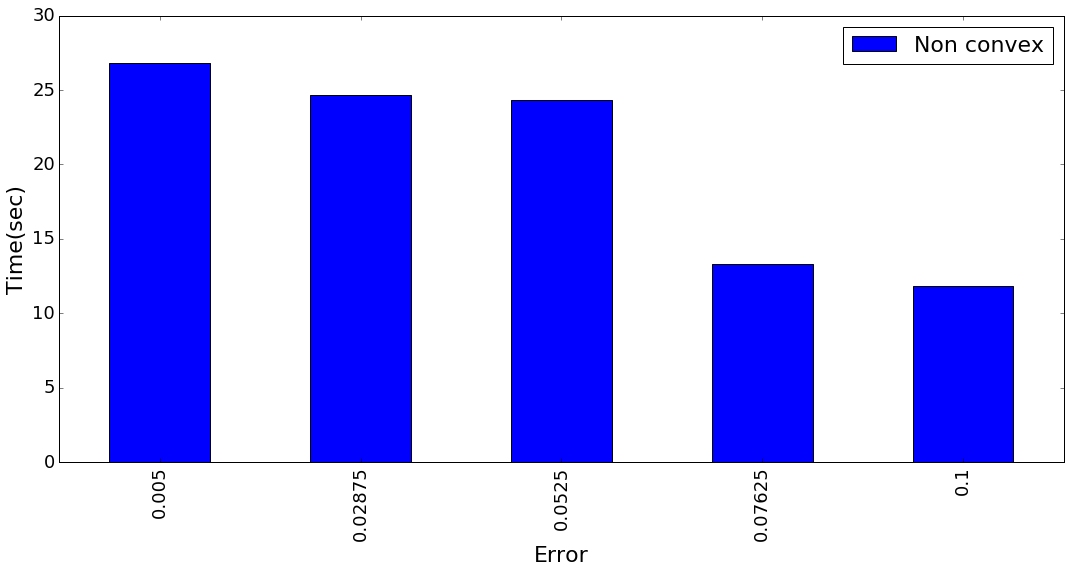

In [45]:
stats_non_convex = []

for epsilon in epsilons:
    print('Epsilon', epsilon)
    X0 = np.random.random((n,d))
    stats1= triplet_algorithms(ste_loss, 
                       triplets,
                       X0,                       
                       d,
                       'full_grad', 
                       10,
                       iters=100,
                       epsilon = epsilon,
                       proj=None,
                       debug=False)
    
    stats_non_convex.append(stats1)
    print()
    


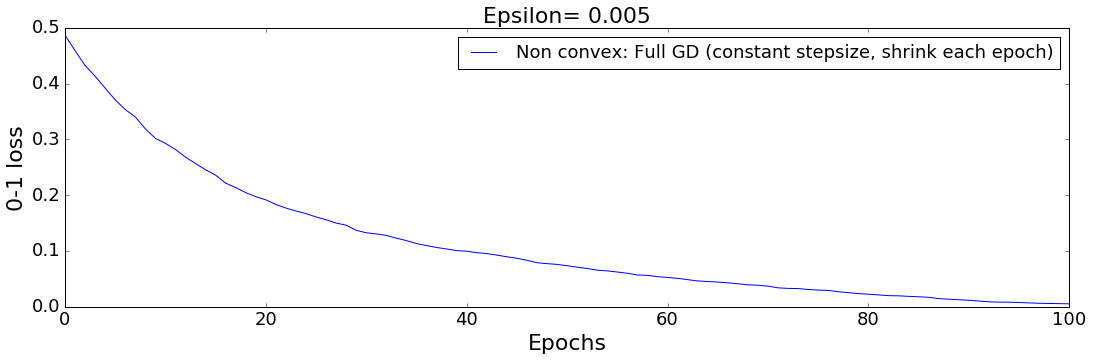

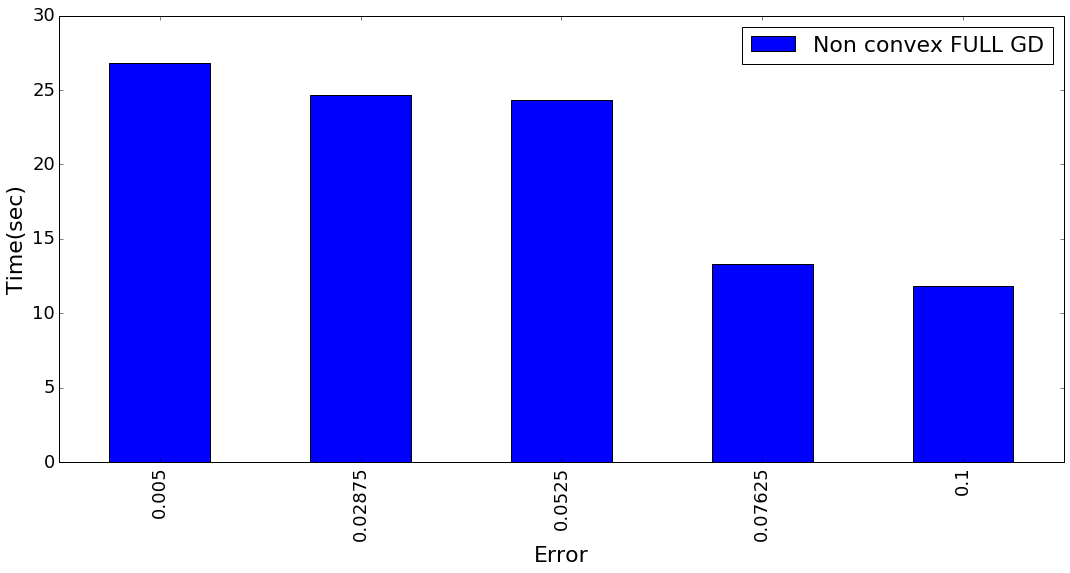

In [54]:
exp = 0
df = pd.DataFrame([
#         stats_convex[3]['emp'],
                   stats_non_convex[exp]['emp'],
#                    stats3['emp'],
#                     list(np.array(stats4['emp'])[epoch_inds])
                  ]).T
df.columns = [
#     'Proj Grad: Full GD (constant stepsize, shrink each epoch)',
              'Non convex: Full GD (constant stepsize, shrink each epoch)', 
#               'Proj Grad: SGD (constant stepsize)',
#               'Non Convex: SGD (constant stepsize, shrink each epoch)',              
             ]

ax = df.plot(figsize=(18,5), fontsize=18)
ax.set_ylabel('0-1 loss', fontsize=22)
ax.set_xlabel('Epochs', fontsize=22)
ax.set_title('Epsilon= {}'.format(epsilons[exp]), fontsize=22)
ax.legend(fontsize=18);

df = []
for i in stats_non_convex:
    df.append(sum(i['time_per_iter']))
    
df = pd.DataFrame(df, columns=['Non convex FULL GD'], index=np.linspace(0.005, 0.1,5))
ax = df.plot(figsize=(18,8), fontsize=18, kind='bar')
ax.set_ylabel('Time(sec)', fontsize=22)
ax.set_xlabel('Error', fontsize=22)
ax.legend(fontsize=22, loc='upper right');        

In [ ]:
# X0 = np.random.random((n,d))
# # X0 = X
exp = 2
stats4= triplet_algorithms(ste_loss, 
                           triplets,
                           X0,                       
                           d,
                           'sgd', 
                           0.2,
                           iters=5000,
                           epsilon = epsilons[exp],
                           proj=None,
                           debug=True
                          )

Shrinking alpha 0.18000000000000002
0 LOG ERROR 0.8069218478345039 Emp error 0.49733333333333335
1 LOG ERROR 0.8055194035152219 Emp error 0.49766666666666665
2 LOG ERROR 0.8051203375027398 Emp error 0.497
3 LOG ERROR 0.805429370507441 Emp error 0.497
4 LOG ERROR 0.8042488512720479 Emp error 0.49566666666666664
5 LOG ERROR 0.8037586808615342 Emp error 0.49333333333333335
6 LOG ERROR 0.8047037944454413 Emp error 0.49366666666666664
7 LOG ERROR 0.8051018700136932 Emp error 0.492
8 LOG ERROR 0.8052062519352661 Emp error 0.49133333333333334
9 LOG ERROR 0.805725210118794 Emp error 0.491
10 LOG ERROR 0.8059405541710212 Emp error 0.48966666666666664
11 LOG ERROR 0.8059512158866203 Emp error 0.491
12 LOG ERROR 0.8030215541443616 Emp error 0.4886666666666667
13 LOG ERROR 0.8029422866970536 Emp error 0.489
14 LOG ERROR 0.8028667367622683 Emp error 0.48966666666666664
15 LOG ERROR 0.8024835807084305 Emp error 0.48966666666666664
16 LOG ERROR 0.8000010919418067 Emp error 0.48966666666666664
17 LOG 

In [7]:
M0 = np.random.randn(n,n)
stats_convex = []
for epsilon in epsilons:
    stats2 = triplet_algorithms(ste_loss_convex, 
                       triplets,
                       M0,                       
                       d,                            
                       'full_grad', 
                        600,
                       iters=5000,
                       epsilon =epsilon,
                       proj=projected,
                       debug= False)
    
    stats_convex.append(stats2)

Accuracy reached in 21 iterations
Accuracy reached in 13 iterations
Accuracy reached in 10 iterations
Accuracy reached in 8 iterations
Accuracy reached in 7 iterations


In [ ]:
df = []
for i in stats_convex:
    df.append(sum(i['time_per_iter']))
    
df = pd.DataFrame(df, columns=['Non convex'], index=np.linspace(0.005, 0.1,5))
ax = df.plot(figsize=(18,8), fontsize=18, kind='bar')
ax.set_ylabel('Time(sec)', fontsize=22)
ax.set_xlabel('Error', fontsize=22)
ax.legend(fontsize=22, loc='upper right');        

In [13]:
# stats3 = triplet_algorithms(ste_loss_convex, 
#                             triplets,
#                             M0,                       
#                             d,                            
#                             'sgd', 
#                             3,
#                             iters=5000,
#                             epsilon = 0.07625,
#                             proj=projected)

0.507
No progress


In [ ]:
# stats2['emp']

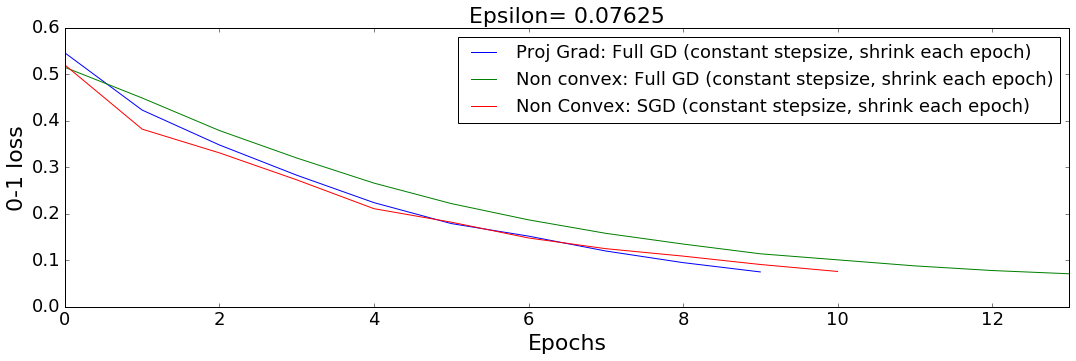

In [39]:
epoch_inds = np.linspace(0, len(stats4['emp'])-1, stats4['epoch_count'], dtype=int)

df = pd.DataFrame([stats_convex[3]['emp'],
                   stats_non_convex[3]['emp'],
#                    stats3['emp'],
                    list(np.array(stats4['emp'])[epoch_inds])
                  ]).T
df.columns = ['Proj Grad: Full GD (constant stepsize, shrink each epoch)',
              'Non convex: Full GD (constant stepsize, shrink each epoch)', 
#               'Proj Grad: SGD (constant stepsize)',
              'Non Convex: SGD (constant stepsize, shrink each epoch)',              
             ]

ax = df.plot(figsize=(18,5), fontsize=18)
ax.set_ylabel('0-1 loss', fontsize=22)
ax.set_xlabel('Epochs', fontsize=22)
ax.set_title('Epsilon= {}'.format(0.07625), fontsize=22)
ax.legend(fontsize=18);

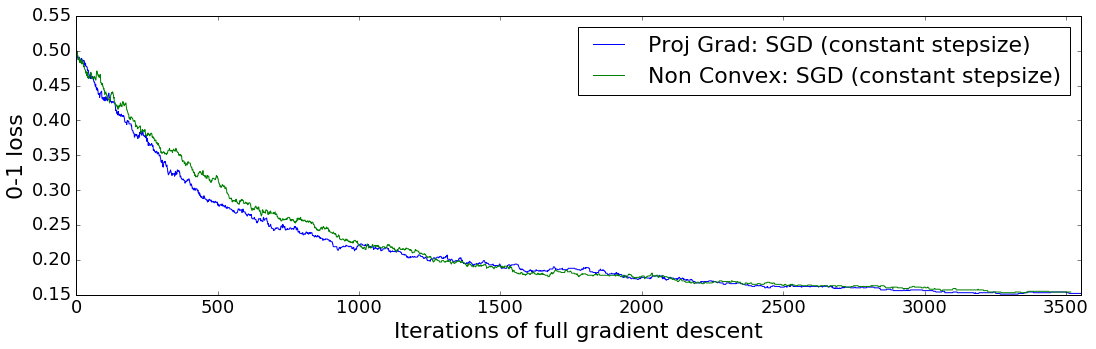

In [21]:
df = pd.DataFrame([
#                 stats2['emp'],
#                 stats1['emp'],
                   stats3['emp'],
                   stats4['emp'],                   
                  ]
                 ).T
df.columns = [
#     'Proj Grad: Full GD (constant stepsize)',
#               'Non convex full gradient descent (constant stepsize)', 
              'Proj Grad: SGD (constant stepsize)',
              'Non Convex: SGD (constant stepsize)',              
             ]

ax = df.plot(figsize=(18,5), fontsize=18)
ax.set_ylabel('0-1 loss', fontsize=22)
ax.set_xlabel('Iterations of full gradient descent', fontsize=22)
ax.legend(fontsize=22);

In [43]:
sum(stats1['time_per_iter'])

7.238949775695801

In [42]:
sum(stats2['time_per_iter'])

169.49984312057495

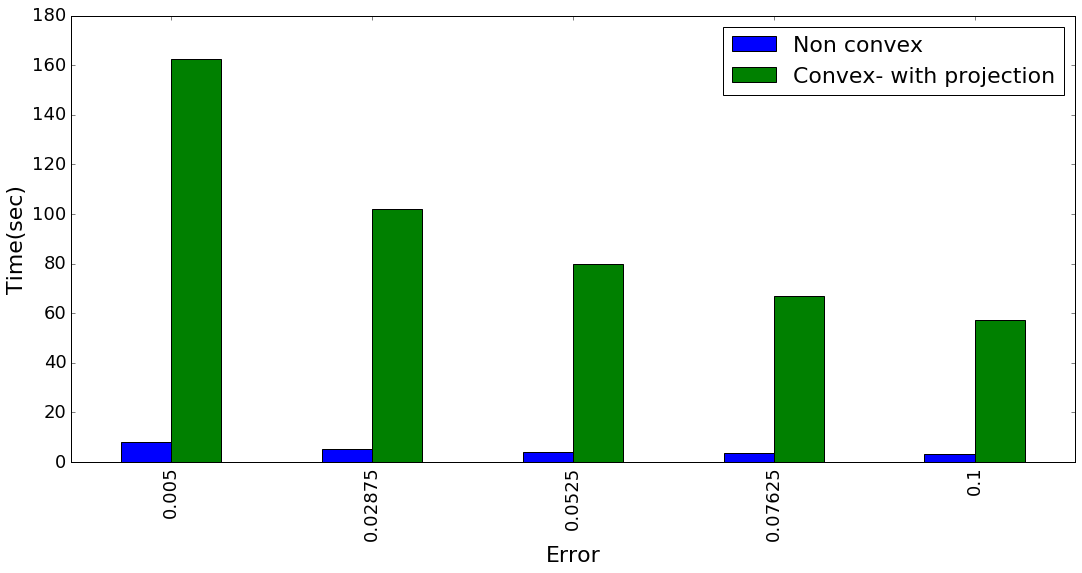

In [79]:
df = []
for i,j in zip(stats_non_convex,stats_convex):
    df.append([sum(i['time_per_iter']), len(j['emp'])*stats_convex[0]['avg_time_per_iter']])
    
df = pd.DataFrame(df, columns=['Non convex', 'Convex- with projection'], index=np.linspace(0.005, 0.1,5))
ax = df.plot(figsize=(18,8), fontsize=18, kind='bar')
ax.set_ylabel('Time(sec)', fontsize=22)
ax.set_xlabel('Error', fontsize=22)
ax.legend(fontsize=22, loc='upper right');    

In [80]:
# for i in range(5):
#     print(len(stats_convex[i]['emp']))
#     print(stats_convex[i]['time_per_iter'])
#     print()

In [52]:
epsilons

0.0050000000000000001